In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme()

In [2]:
xgboost = pd.read_csv("./metrics/093_xgboost.csv.zip")
decision_tree = pd.read_csv("./metrics/093_decision_tree.csv.zip")
random_forest = pd.read_csv("./metrics/093_random_forest.csv.zip")
mlp = pd.read_csv("./metrics/093_mlpr.csv.zip")

In [3]:
metrics = pd.concat([xgboost,decision_tree,random_forest,mlp])

In [4]:
metrics.sort_values("r2",ascending=False,inplace=True)

In [5]:
metrics

,model,r2,mae,mse,rmse,mape,time_to_fit,time_to_predict
0,XGBoost,0.966297,49.646901,5255.814172,72.496994,2.345714e+15,12.480480,0.100620
0,MLP,0.923800,74.811658,11882.957548,109.008979,3.952443e+15,370.095582,0.081928
0,Random Forest,0.844833,113.435364,24197.283451,155.554760,4.951081e+15,14.194492,0.128986
0,Decision Tree,0.836164,115.957231,25549.293988,159.841465,5.104655e+15,0.231845,0.004971


In [6]:
metrics.to_csv("./metrics/094_best_metrics.csv.zip",index=False,compression="zip")

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


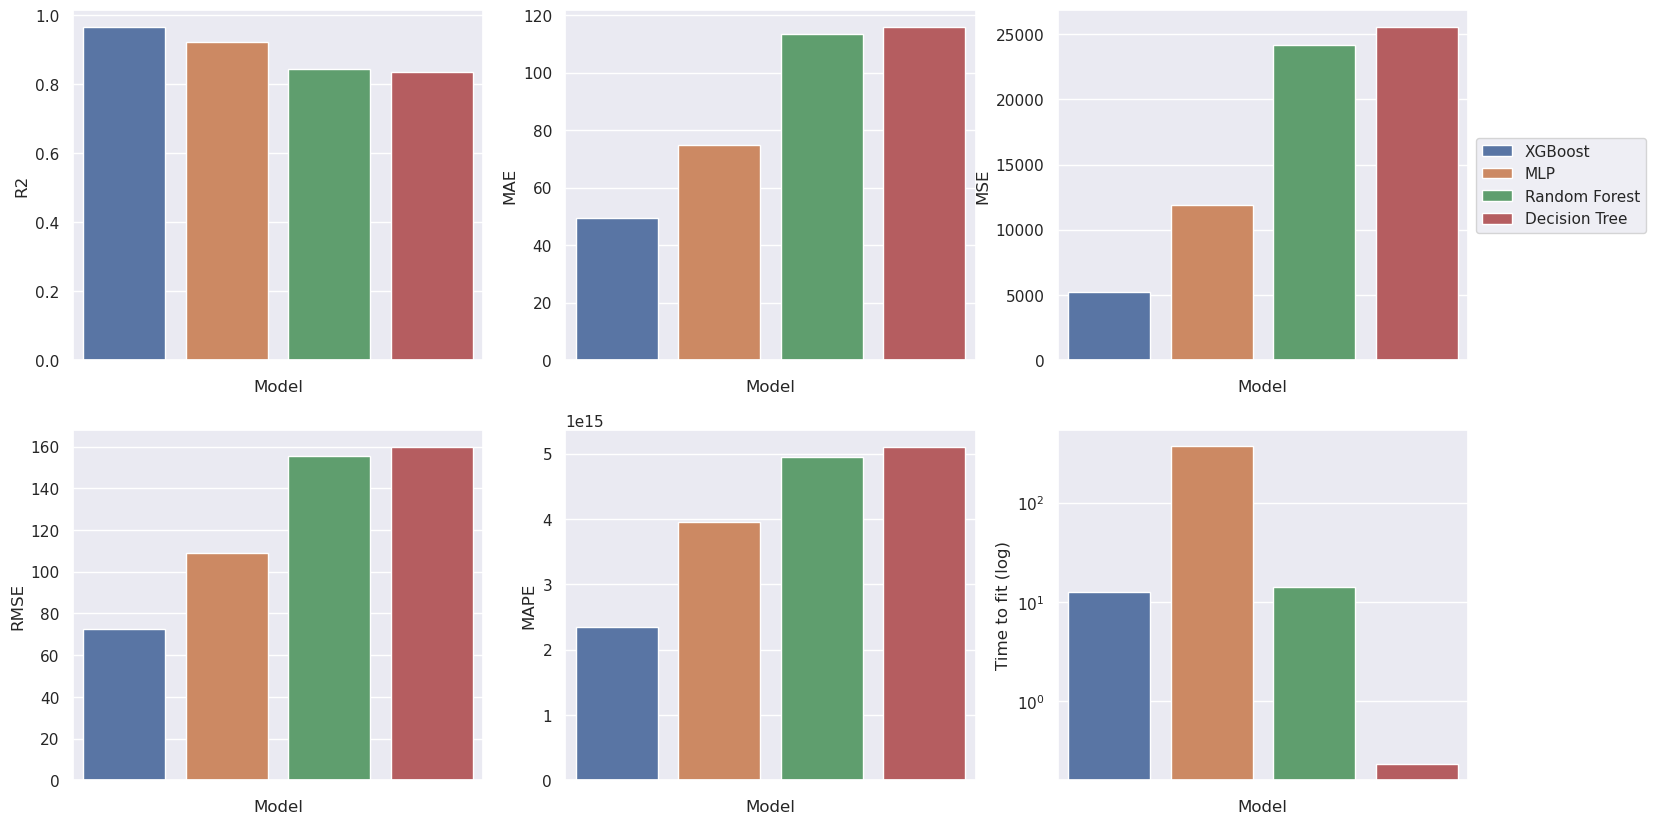

In [7]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

sns.barplot(ax=axes[0, 0], data=metrics, x='model', y='r2',hue="model",dodge=False)
sns.barplot(ax=axes[0, 1], data=metrics, x='model', y='mae',hue="model",dodge=False)
sns.barplot(ax=axes[0, 2], data=metrics, x='model', y='mse',hue="model",dodge=False)
sns.barplot(ax=axes[1, 0], data=metrics, x='model', y='rmse',hue="model",dodge=False)
sns.barplot(ax=axes[1, 1], data=metrics, x='model', y='mape',hue="model",dodge=False)
sns.barplot(ax=axes[1, 2], data=metrics, x='model', y='time_to_fit',hue="model",dodge=False)

axes[0, 0].set(xlabel="Model",xticklabels=[])
axes[0, 0].set(ylabel="R2")
axes[0, 0].get_legend().remove()

axes[0, 1].set(xlabel="Model",xticklabels=[])
axes[0, 1].set(ylabel="MAE")
axes[0, 1].get_legend().remove()

axes[0, 2].set(xlabel="Model",xticklabels=[])
axes[0, 2].set(ylabel="MSE")
axes[0, 2].legend(loc='center left', bbox_to_anchor=(1, 0.5))

axes[1, 0].set(xlabel="Model",xticklabels=[])
axes[1, 0].set(ylabel="RMSE")
axes[1, 0].get_legend().remove()

axes[1, 1].set(xlabel="Model",xticklabels=[])
axes[1, 1].set(ylabel="MAPE")
axes[1, 1].get_legend().remove()

axes[1, 2].set(xlabel="Model",xticklabels=[])
axes[1, 2].set(ylabel="Time to fit (log)",yscale="log")
axes[1, 2].get_legend().remove()

plt.savefig("./plots/094_gardiner_count_incidents_best_metrics.eps",format="eps",bbox_inches="tight")
plt.savefig("./plots/094_gardiner_count_incidents_best_metrics.png",bbox_inches="tight")